# # Project: Investigate a Dataset - [TMDB movies dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul> 

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: TMDB movies dataset 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. 


### Question(s) for Analysis
>Which genres have the most profit?

>Which genres are most popular from year to year? 

>Movies which had most and least profit.

>What kinds of properties are associated with movies that have high revenues?

>Are short movies more popular?

>Year of release vs Profitability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies .csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning
#### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes

###  The Cleaning Process:
>First, I removed columns that are not necessary for my analysis 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id','director', 'production_companies' to improve database redability.

>I adjusted release_date from string to date datatype

>I adjusted the columns (revenue, budget) from float to int.

>I dropped the null values

>I removed the duplicated rows

>Replacing zero with NAN in runtime column.

In [6]:
#dropping unnecessary columns
df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id','director', 'production_companies' ], axis=1, inplace = True)

In [7]:
#checking for duplicates
df.duplicated().sum()

1

In [8]:
#checking for null values
df.isnull().sum().sum()

23

In [9]:
#dropping null values
df.dropna(inplace=True)

In [10]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [11]:
#checking..
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
id                10842 non-null int64
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


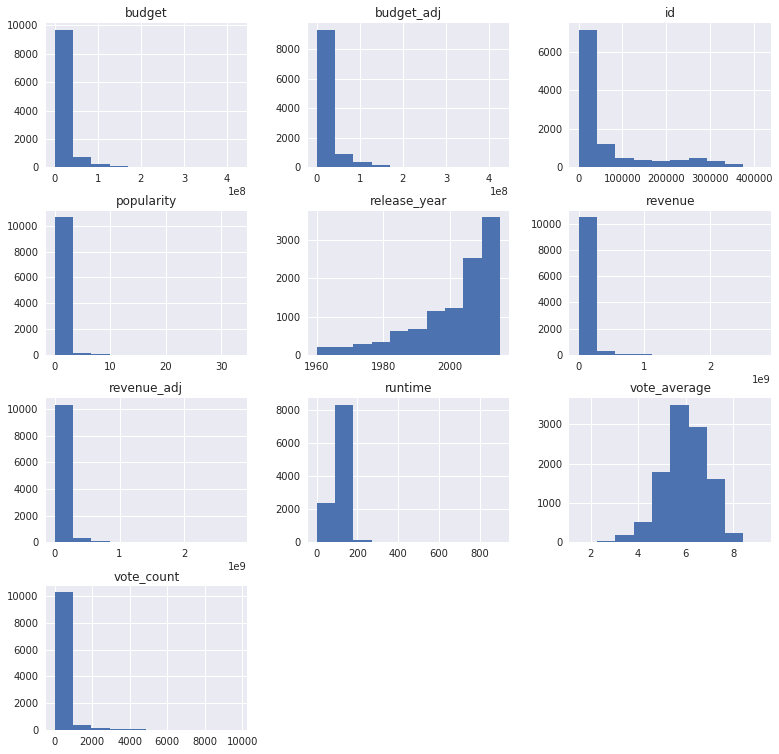

In [12]:
#having an overview of our dataset
df.hist(figsize=(13,13));

In [13]:
#converting datatypes
df['release_date'] = pd.to_datetime(df['release_date'])

In [14]:
#checking
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
id                10842 non-null int64
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 1.2+ MB


In [15]:
#checking if there is any 0 values in "budget"
(df['budget']==0).sum()

5674

In [16]:
#replacing 0 values with NAN values
df['budget'].replace(0, np.NAN, inplace=True)

In [17]:
#checking if there is any 0 values in "revenue"
(df['revenue']==0).sum()

5993

In [18]:
#replacing 0 values with NAN values
df['revenue'].replace(0, np.NAN, inplace=True)

In [19]:
df.dropna(axis=0, inplace=True)

In [20]:
#checking..
(df['budget']==0).sum()

0

In [21]:
#checking
(df['revenue']==0).sum()

0

In [22]:
change_type=['budget', 'revenue']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)
#printing the changed information
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

### We split both ('genres) as it contains ('|') in the cells to have a good intuition about the data

In [23]:
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Action|Drama|Horror|Thriller', 'Adventure|Animation|Drama',
       'Action|Adventure|Drama|War|Romance'], dtype=object)

### First we check if there is cells that contain ('|')

In [24]:
#splitting the genre column
df['genres'] = df['genres'].str.split('[|]', expand=True)

In [25]:
#checking
df['genres'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Thriller',
       'Fantasy', 'History', 'Mystery', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
id                3854 non-null int64
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 421.5+ KB


## Exploratory Data Analysis
>After cleaning our dataset Now we shall analyze it looking at the genres of movies and it's relations with other variables.

### Inserting a new column ('profit_earned')

In [27]:
#Calculating the profit_earned of each movie:
df.insert(2,'profit_earned',df['revenue']-df['budget'])
df.head(2)

,id,popularity,profit_earned,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


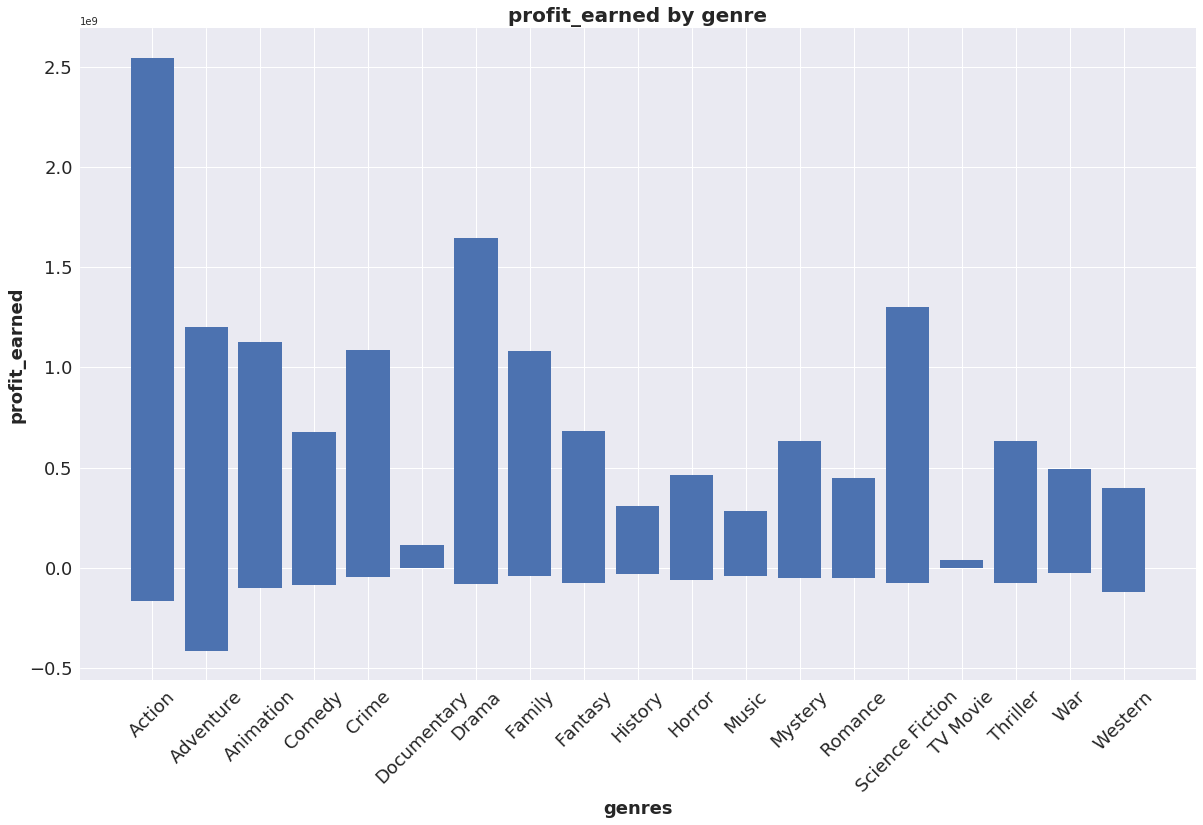

In [28]:
plt.subplots(figsize=(20,12))
plt.bar(df['genres'], df['profit_earned'])
plt.xticks(rotation = 45, fontsize = 18)
plt.yticks(fontsize = 18) 
plt.title("profit_earned by genre", fontsize = 20, fontweight = "bold") 
plt.ylabel("profit_earned", fontsize = 18 , fontweight = "bold")
plt.xlabel('genres',fontsize = 18, fontweight = "bold");

>We conclude that Action movies have the highest profrit earned, adventure movies can be a risk investment and that both documentry and Tv movies have almost no profit.

### Movies which had most and least profit

In [29]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
profit_earned,2544505847,-413912431
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
runtime,162,100
genres,Action,Adventure
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
vote_count,8458,74


### Investigating the most popular genres

In [30]:
geners_popularity = df.groupby('genres')['popularity'].mean()

In [31]:
geners_popularity

genres
Action             1.442326
Adventure          1.905525
Animation          1.712723
Comedy             0.914765
Crime              1.074895
Documentary        0.289461
Drama              0.927571
Family             1.609295
Fantasy            1.581660
History            1.442235
Horror             0.855787
Music              0.914098
Mystery            1.133780
Romance            1.369972
Science Fiction    1.931437
TV Movie           0.273628
Thriller           1.171430
War                1.658497
Western            1.193918
Name: popularity, dtype: float64

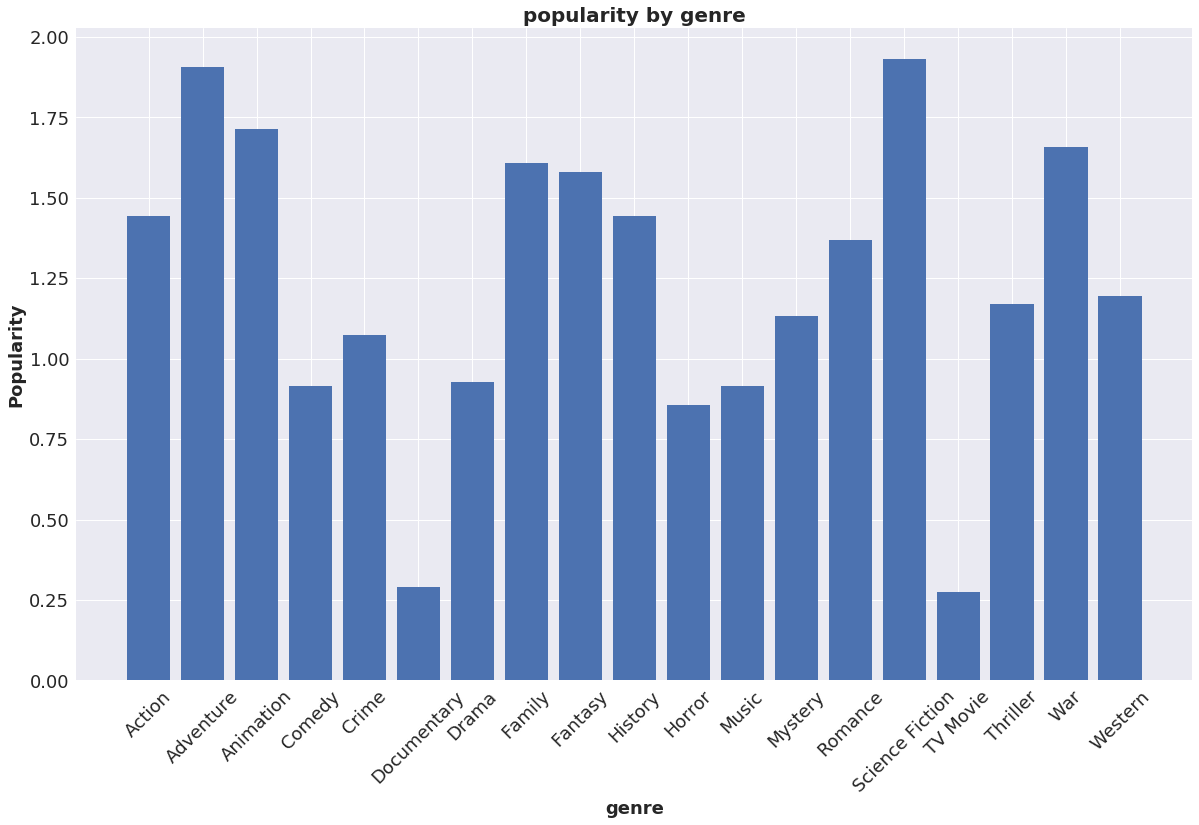

In [32]:
plt.subplots(figsize=(20,12))
plt.bar(geners_popularity.index, geners_popularity)
plt.xticks(rotation = 45, fontsize = 18)
plt.yticks(fontsize = 18) 
plt.title("popularity by genre", fontsize = 20, fontweight = "bold") 
plt.ylabel("Popularity", fontsize = 18 , fontweight = "bold")
plt.xlabel('genre',fontsize = 18, fontweight = "bold");

>By Visualizing the data, we can conclude that Adventure is the most popular genre.

# What kinds of properties are associated with movies that have high revenues?

In [33]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Sort movies by revenue in descending order

In [34]:
sorted_revenue = df.sort_values('revenue', ascending= False).head(200)

In [35]:
sorted_revenue.head()

,id,popularity,profit_earned,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,2544505847,237000000,2781505847,Avatar,162,Action,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,11.173104,1868178225,200000000,2068178225,Star Wars: The Force Awakens,136,Action,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,4.355219,1645034188,200000000,1845034188,Titanic,194,Drama,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,7.637767,1299557910,220000000,1519557910,The Avengers,143,Science Fiction,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


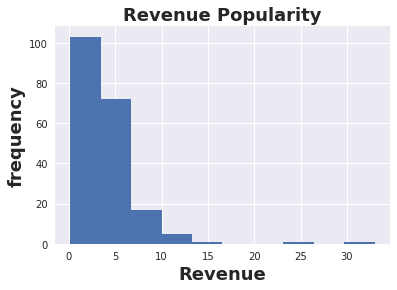

In [36]:
sorted_revenue['popularity'].hist()
plt.title('Revenue Popularity', fontsize = 18, fontweight = 'bold')
plt.xlabel('Revenue', fontsize = 18, fontweight = 'bold')
plt.ylabel('frequency', fontsize = 18, fontweight = 'bold');

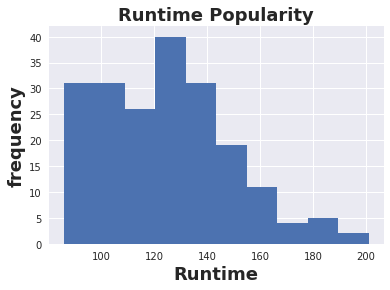

In [37]:
sorted_revenue['runtime'].hist()
plt.title('Runtime Popularity', fontsize = 18, fontweight = 'bold')
plt.xlabel('Runtime', fontsize = 18, fontweight = 'bold')
plt.ylabel('frequency', fontsize = 18, fontweight = 'bold');

>I got that the most revenuable movies has popularity around 2.5 and it's run time is between 100-130 min for most of them.

# Are short movies more popular?

>a short movie is a motion picture up to 50 minutes long.

In [38]:
df.head(1)

,id,popularity,profit_earned,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [39]:
short_movies = df.query('runtime < 50')
long_movies  = df.query('runtime >= 50')

In [40]:
short_movies_pop = short_movies['popularity'].mean()
long_movies_pop = long_movies['popularity'].mean()

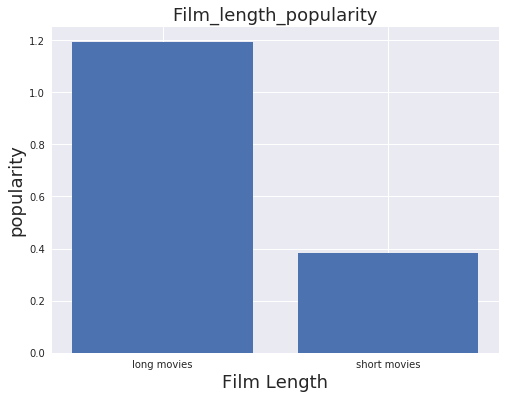

In [41]:
plt.figure(figsize=(8,6))
x = ['short movies', 'long movies']
height = [short_movies_pop,long_movies_pop ]
plt.bar(x, height, width = 0.8)
plt.title('Film_length_popularity',fontsize = 18 )
plt.xlabel('Film Length', fontsize = 18)
plt.ylabel('popularity', fontsize = 18);

In [42]:
df.head(1)

,id,popularity,profit_earned,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


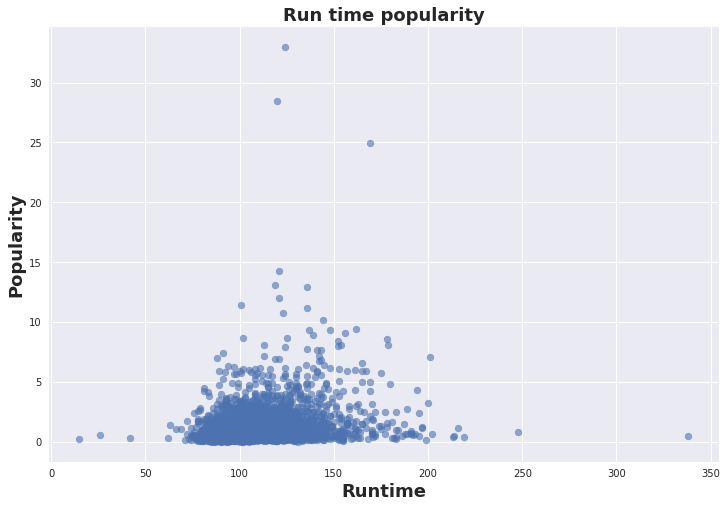

In [43]:
plt.figure(figsize = (12, 8)) # size of the figure
scatter = plt.scatter(df['runtime'],
            df['popularity'], 
            alpha = 0.6) #transparency level of points on the plot. Used to avoid overplotting
            
# add and format additional elements, such as legends, titles and axis labels
plt.title("Run time popularity", 
          fontsize = 18, 
          weight = "bold")
plt.xlabel("Runtime",fontsize = 18, weight = "bold")
plt.ylabel("Popularity",fontsize = 18, weight = "bold")
plt.show()

>We can conclude that short movies (less than 50 mins) are less popular than longer movies.

## Year of release vs Profitability

In [44]:
profit_year = df.groupby('release_year')['profit_earned'].sum()

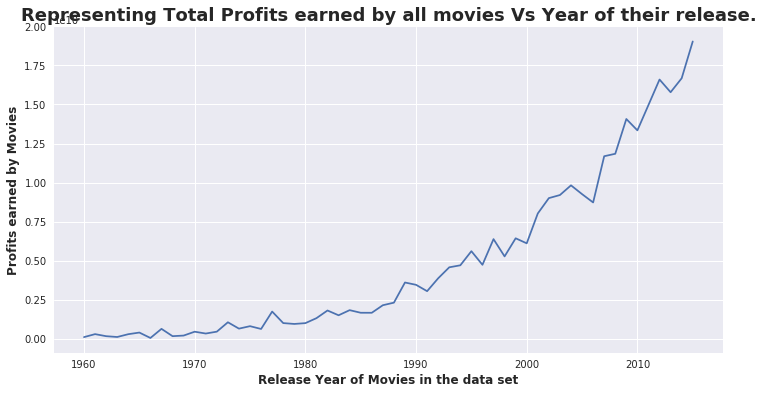

In [45]:
plt.figure(figsize=(12,6))

#plotting the graph
plt.plot(profit_year)
#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12, weight = "bold")
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12, weight = "bold")
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.', fontsize = 18, weight = "bold")
#displaying the line plot
plt.show()

>It seems like the more recent the movie the higher its profit

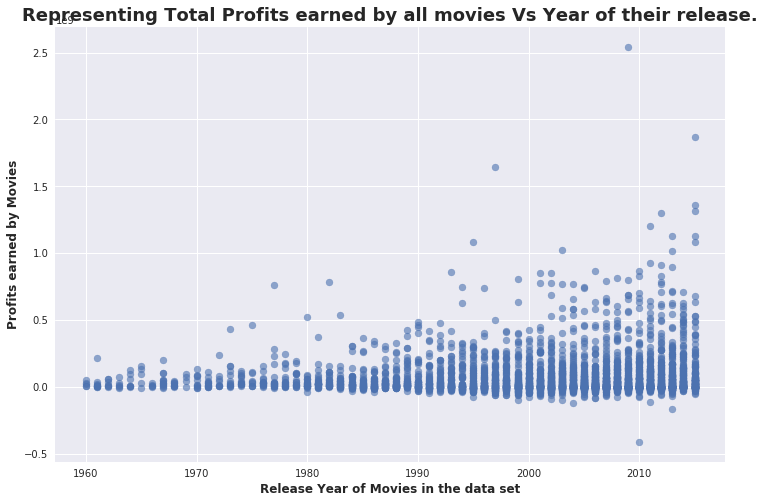

In [46]:
plt.figure(figsize = (12, 8)) # size of the figure
scatter = plt.scatter(df['release_year'],
            df['profit_earned'], 
            alpha = 0.6) #transparency level of points on the plot. Used to avoid overplotting

plt.xlabel('Release Year of Movies in the data set', fontsize = 12, weight = "bold")
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12, weight = "bold")
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.', fontsize = 18, weight = "bold")
#displaying the line plot
plt.show()

>Another Visualization that emphasize our conclusion, that the more recent a movie is, the higher its chance of getting a higher profit

## Conclusions
>We conclude that Action movies have the highest profrit earned, adventure movies can be a risk investment and that both documentry and Tv movies have almost no profit.

>I found out that adventure movies are the most popular genre, after it the science fiction genre, which came as a surprise as I thought action movies will at least come second, but came fourth.

>We concluded that Avatar is the movie with highest profit, and that The Warrior's Way is the movie with the worst profit in our dataset.

>I wanted to know some characteristics of most revenuable movies so I found that the most revenuable movies are not that popular as it should it should be, also I found out that its runtime approximately 100-130 min.

>We can concluded that short movies (less than 50 mins) are less popular than longer movies.

> We concluded that the more recent a movie is, the higher its chance of getting a higher profit.